# Generative AI playground
Quick start: pip install -q -U google-genai


## import stuff

In [1]:
import config
from google import genai
from google.genai import types



## Code base: basic text generation

In [2]:
from google import genai


client = genai.Client(api_key=config.apikey)

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents="Explain how AI works in less than 100 words",
)

print(response.text)

AI works by training algorithms on vast amounts of data. These algorithms learn patterns and relationships, enabling them to make predictions, classifications, or decisions without explicit programming for every scenario. They use techniques like machine learning, deep learning, and natural language processing to mimic human intelligence, such as recognizing images, understanding language, and solving problems. Essentially, AI learns from data to perform tasks that typically require human intellect.



## Image input

We will use Pillow library to deal with image data.

In [3]:
from PIL import Image
from IPython.display import display

### local image input

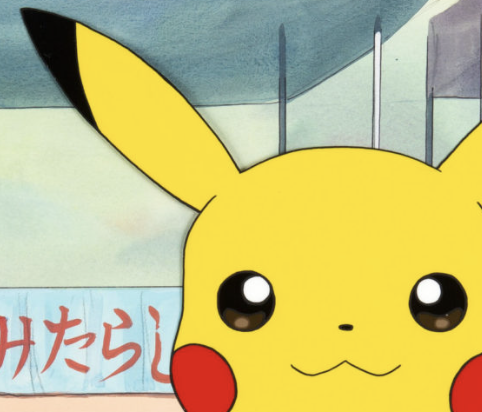

In [4]:
image = Image.open('./img1.png')

# Display the image inline in the notebook
display(image)


In [5]:
client = genai.Client(api_key=config.apikey)
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["What is this image?", image])

print(response.text)

The image is a close-up of Pikachu from Pokémon.


### Public image

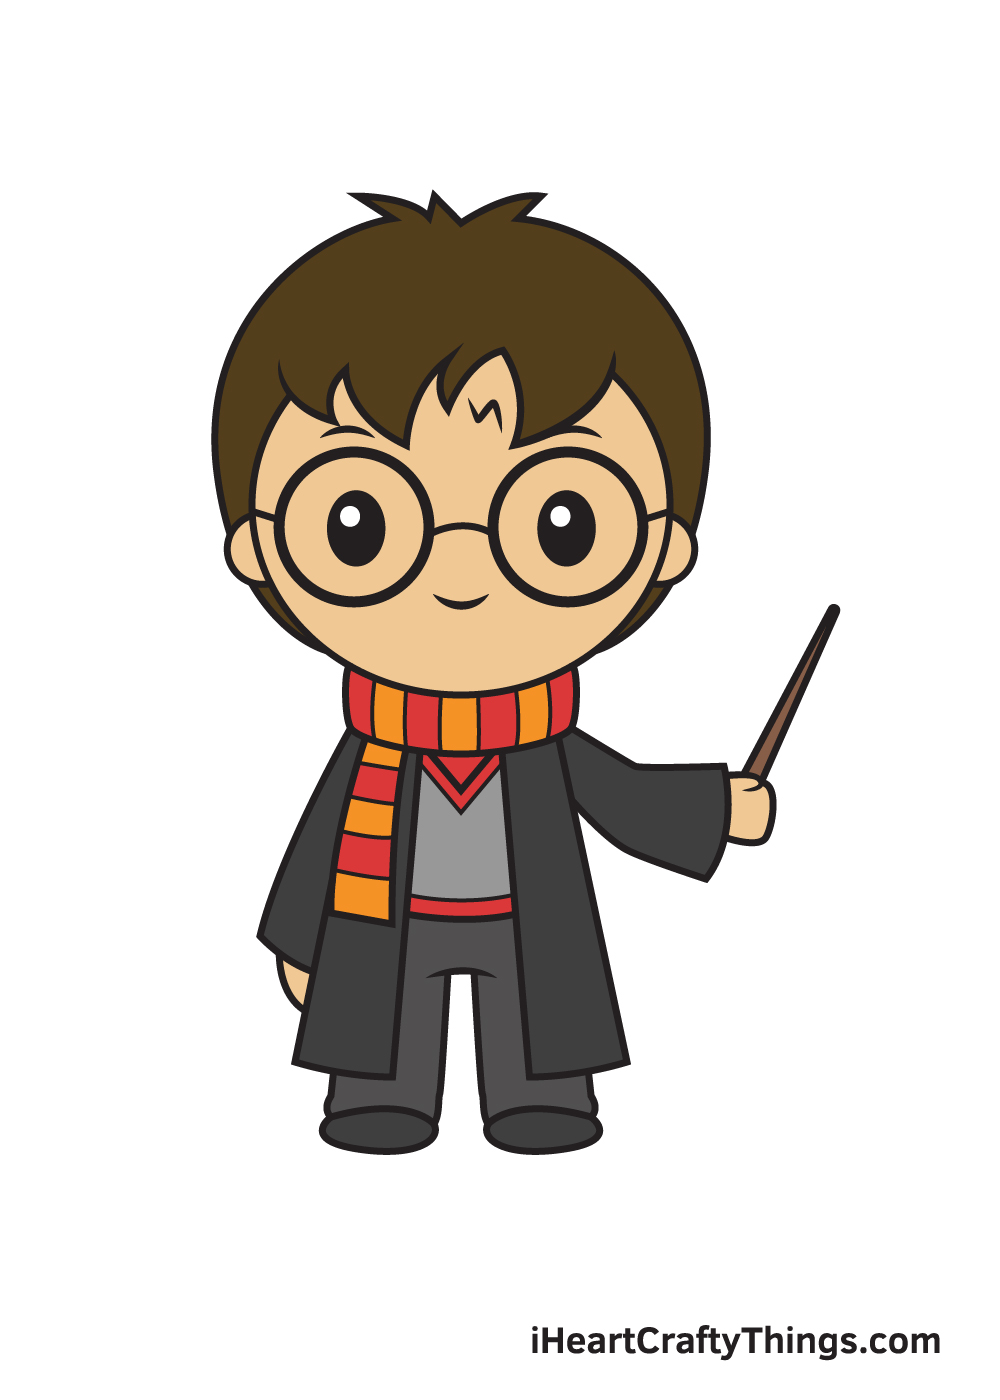

In [7]:
from io import BytesIO
import requests
from PIL import Image  # Changed to more common import style
from IPython.display import display

image_path = r"https://iheartcraftythings.com/wp-content/uploads/2021/04/Harry-Potter-DRAWING-%E2%80%93-STEP-10.jpg"
response = requests.get(image_path)  # Changed variable name from 'image' to 'response'

# Open image from the response
image2 = Image.open(BytesIO(response.content))

# Display the image
display(image2)

In [8]:
client = genai.Client(api_key=config.apikey)
response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents=["What is this image?", image2])

print(response.text)

The image is a cartoon drawing of Harry Potter. He is wearing his signature round glasses, a Gryffindor scarf, and a black robe, and he is holding a wand.


## Audio 

In [ ]:
## 